# DATASETS
Récupération des jeux de données.

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import sentry as sentinel

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (9,6)

In [2]:
%reload_ext autoreload
%autoreload 2

## Récupération du FCOVER

In [3]:
# On récupère la liste de toutes les zone <target> à traiter.
datadir = '../data'
ind = 'FCOVER'
listdir = [os.path.join(datadir,d) for d in os.listdir('../data') 
           if os.path.exists(os.path.join(datadir,d,'geozone.json'))]
listdir

['../data/Brunswick',
 '../data/Onca-Puma',
 '../data/Sierra-Mojada',
 '../data/Cerro-Matoso',
 '../data/Barro-Alto',
 '../data/Morro-da-Mina',
 "../data/Voisey's-Bay",
 '../data/Totten',
 '../data/Heath-Steele',
 '../data/South-Walker-Creek',
 '../data/Moatize-Mozambique']

In [14]:
# Calcul des indicateur de FCOVER (c'est moyennement long).
# ATTENTION, il faut que les données GLS soient connectées (par défaut sur disque exterene 4To).
for i,target in tqdm(enumerate(listdir),desc="Zones",total=len(listdir)):
    zone = sentinel.getzone(target)
    sentinel.ocli.glscompute(zone,ind)

Zones:   0%|          | 0/11 [00:00<?, ?it/s]

Brunswick:   0%|          | 0/180 [00:00<?, ?it/s]

Onca-Puma:   0%|          | 0/180 [00:00<?, ?it/s]

Sierra-Mojada:   0%|          | 0/180 [00:00<?, ?it/s]

Cerro-Matoso:   0%|          | 0/180 [00:00<?, ?it/s]

Barro-Alto:   0%|          | 0/180 [00:00<?, ?it/s]

Morro-da-Mina:   0%|          | 0/180 [00:00<?, ?it/s]

Voisey's-Bay:   0%|          | 0/180 [00:00<?, ?it/s]

Totten:   0%|          | 0/180 [00:00<?, ?it/s]

Heath-Steele:   0%|          | 0/180 [00:00<?, ?it/s]

South-Walker-Creek:   0%|          | 0/180 [00:00<?, ?it/s]

Moatize-Mozambique:   0%|          | 0/180 [00:00<?, ?it/s]

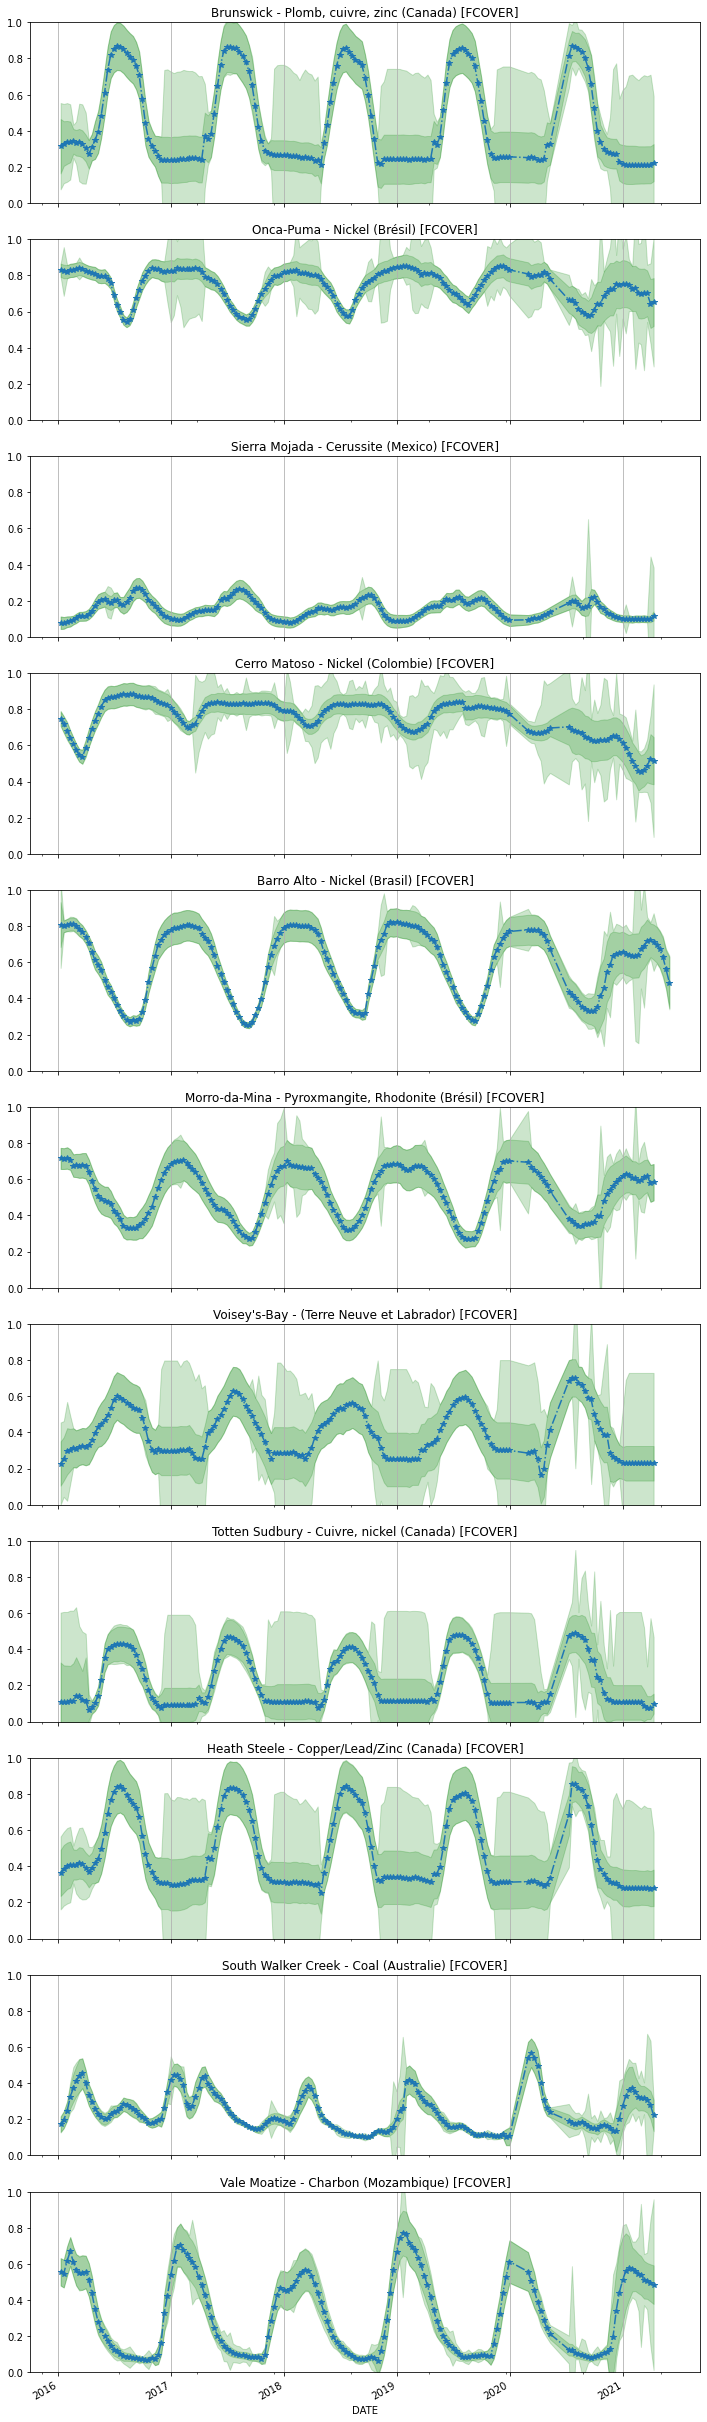

In [5]:
# Affichage des indicateurs FCOVER.
ig,axes = plt.subplots(len(listdir),1,sharex=True,figsize=(12,48))
#fig.subplots_adjust(hspace=0.0,wspace=0.0)
for i,target in enumerate(listdir):
    zone = sentinel.getzone(target)
    plt.subplot(axes[i])
    sentinel.dataset.glsplot(zone,ind)
    plt.ylim((0.0,1.0))
    plt.grid(axis='x')

## Calcul des RVI et corrélations avec FCOVER.

On accumule ensuite les données dans un tableau global pour tout normaliser.

In [50]:
# Calculs des indicateurs (c'est long).
# ATTENTION, à ne pas relancer.
for i,target in tqdm(enumerate(listdir), desc="Zones", total=len(listdir)):
    zone = sentinel.getzone(target)
    sentinel.grdzone.rvicompute(zone,renew=False) # True pour tout recalculer.
    sentinel.dataset.rvicorrect(zone)

Zones:   0%|          | 0/11 [00:00<?, ?it/s]

Brunswick:   0%|          | 0/166 [00:00<?, ?it/s]

Onca-Puma:   0%|          | 0/95 [00:00<?, ?it/s]

Sierra-Mojada:   0%|          | 0/133 [00:00<?, ?it/s]

Cerro-Matoso:   0%|          | 0/99 [00:00<?, ?it/s]

Barro-Alto:   0%|          | 0/119 [00:00<?, ?it/s]

Morro-da-Mina:   0%|          | 0/69 [00:00<?, ?it/s]

Voisey's-Bay:   0%|          | 0/116 [00:00<?, ?it/s]

Totten:   0%|          | 0/67 [00:00<?, ?it/s]

Heath-Steele:   0%|          | 0/171 [00:00<?, ?it/s]

South-Walker-Creek:   0%|          | 0/63 [00:00<?, ?it/s]

Moatize-Mozambique:   0%|          | 0/89 [00:00<?, ?it/s]

In [6]:
# Accumulation des données dans un tableau global pour la normalisation.
RR = None
for target in listdir:
    zone = sentinel.getzone(target)
    R = sentinel.dataset.rvi(zone)
    if RR is None:
        RR = R
    else:
        RR = RR.append(R,ignore_index=True)
RR['RVIC'].min(), RR['RVIC'].max()

(2.0149203138028544, 2.030847516223765)

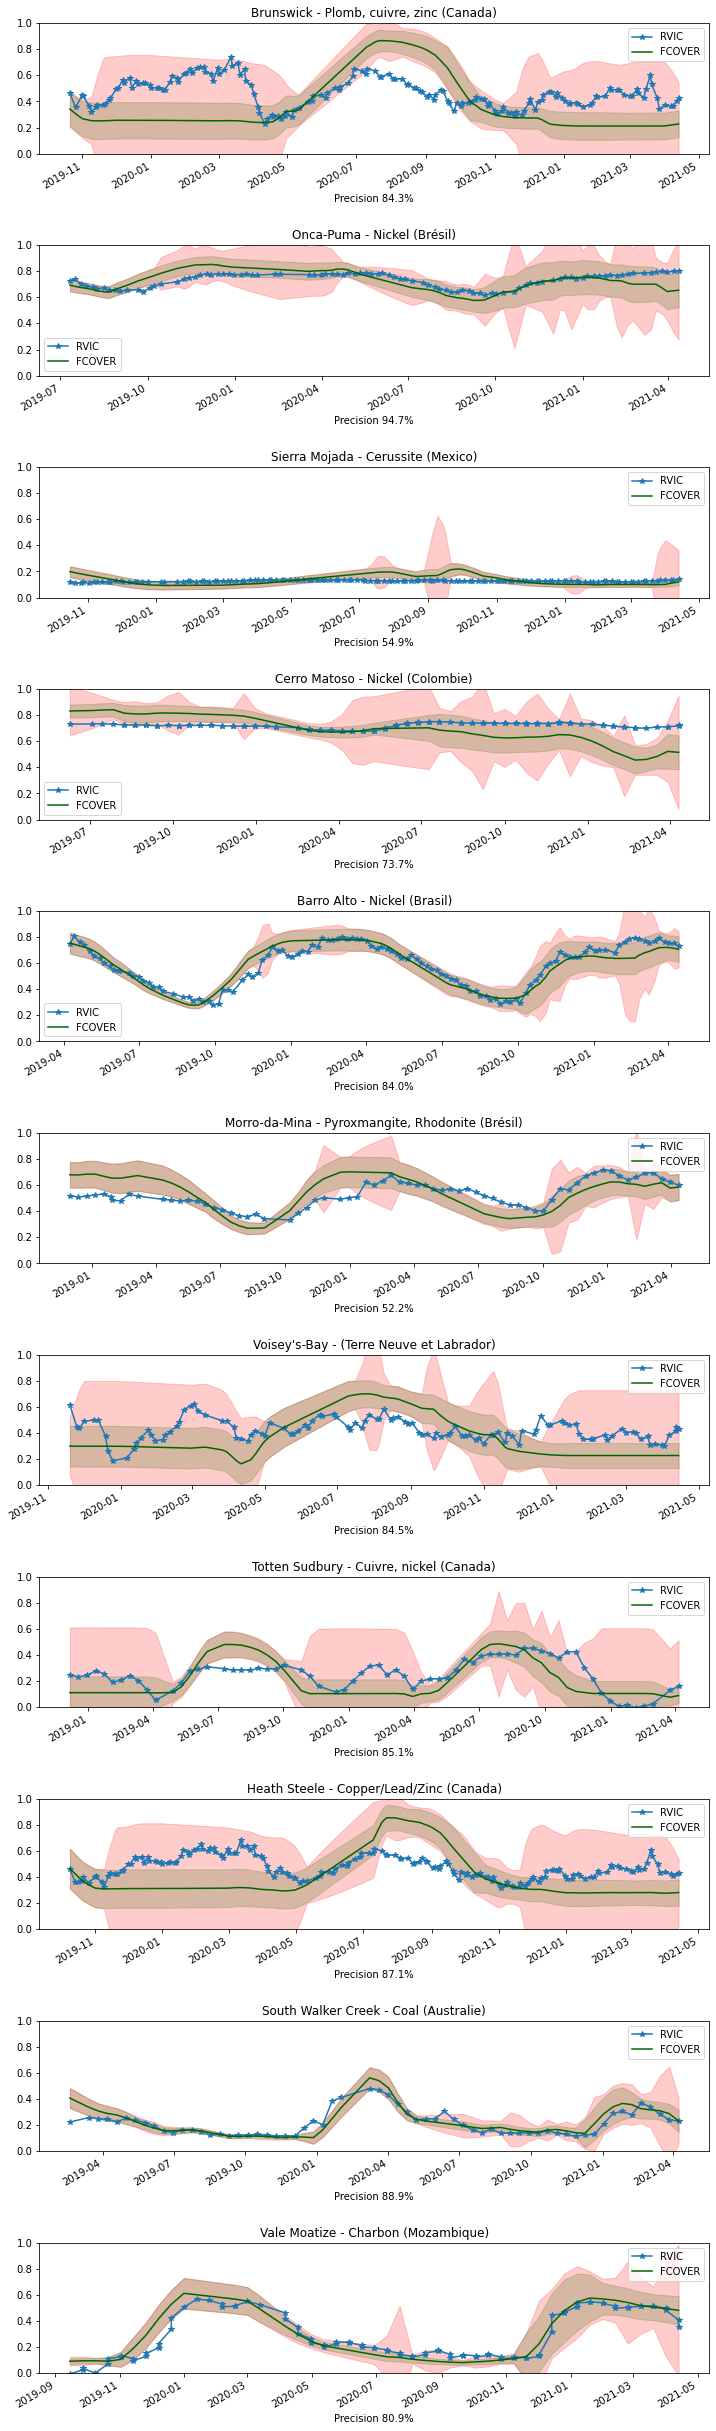

In [7]:
# Affichage de RVI seul
fig,axes = plt.subplots(len(listdir),1,figsize=(12,48))
fig.subplots_adjust(hspace=0.7,wspace=0.2)
dc = pd.DataFrame(columns=['NAME','PR','R2', 'PEARSON','KENDALL'])
for i,target in enumerate(listdir):
    zone = sentinel.getzone(target)
    
    # Afficheage de FCOVER
    plt.subplot(axes[i])
    d = sentinel.dataset.rvicompare(zone,'FCOVER',plotind=True, plotrvi=True)
    plt.title(zone['name'])

    # Afficheage de FCOVER
    #plt.subplot(axes[i,1])
    #sentinel.dataset.rvicompare(zone,'FCOVER',plotrvi=True)
    #plt.title(zone['name'])

    # Corrélations
    dc = dc.append(d, ignore_index=True)

In [8]:
# Résultat des corrélations
dc

,NAME,PR,R2,PEARSON,KENDALL
0,"Brunswick - Plomb, cuivre, zinc (Canada)",0.843373,0.191497,0.232062,0.045520
1,Onca-Puma - Nickel (Brésil),0.947368,0.543716,0.683058,0.428891
2,Sierra Mojada - Cerussite (Mexico),0.548872,0.025879,0.106932,0.177945
3,Cerro Matoso - Nickel (Colombie),0.737374,0.032081,0.080863,0.082627
4,Barro Alto - Nickel (Brasil),0.840336,0.910913,0.936113,0.731092
5,"Morro-da-Mina - Pyroxmangite, Rhodonite (Brésil)",0.521739,0.484400,0.610591,0.372549
6,Voisey's-Bay - (Terre Neuve et Labrador),0.844828,0.175040,0.340559,0.237704
7,"Totten Sudbury - Cuivre, nickel (Canada)",0.850746,0.402608,0.627884,0.490567
8,Heath Steele - Copper/Lead/Zinc (Canada),0.871345,0.173600,0.229149,0.164639
9,South Walker Creek - Coal (Australie),0.888889,0.807001,0.882042,0.713262


### Affichage des images.

Zones:   0%|          | 0/11 [00:00<?, ?it/s]

KeyboardInterrupt: 

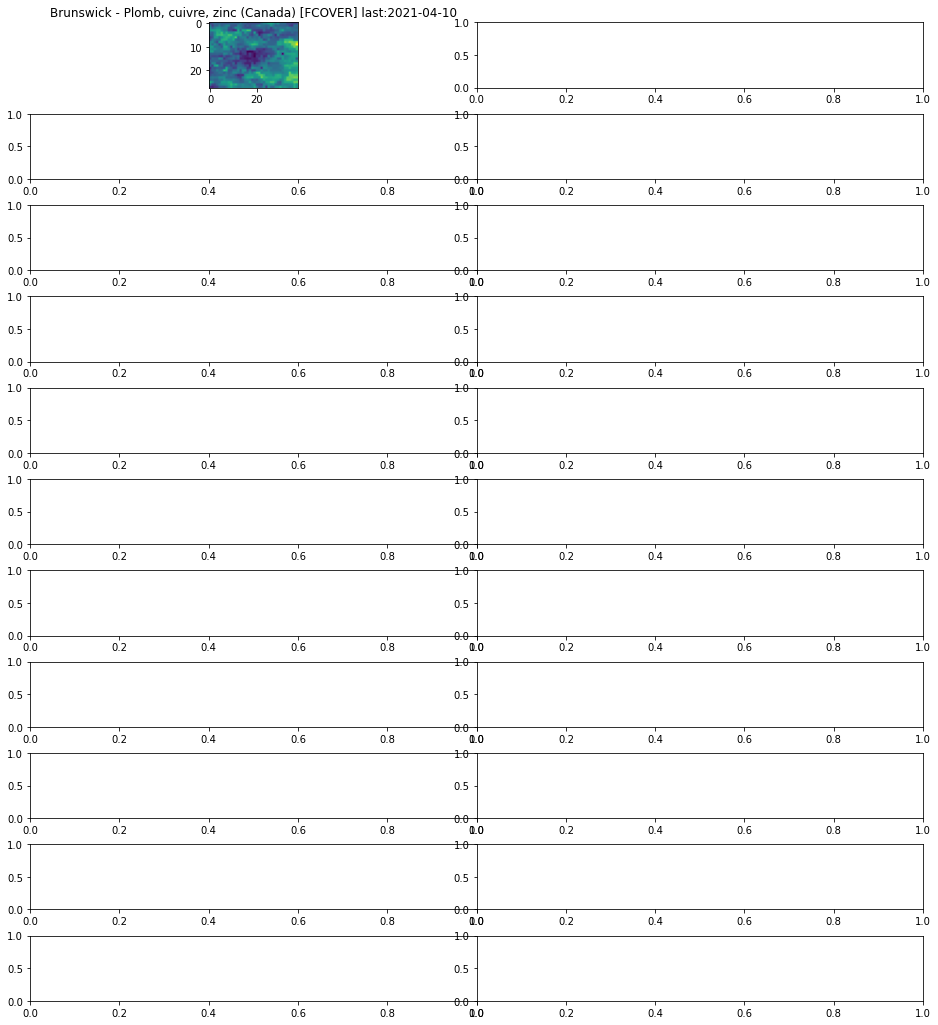

In [9]:
fig,axes = plt.subplots(len(listdir),2,figsize=(16,18))
fig.subplots_adjust(hspace=0.4,wspace=0)
for i,target in tqdm(enumerate(listdir), desc="Zones", total=len(listdir)):
    zone = sentinel.getzone(target)
    R = sentinel.dataset.rvi(zone)
    
    # Image optique
    plt.subplot(axes[i,0])
    sentinel.ocli.glslast(zone,ind)

    # Image radar
    plt.subplot(axes[i,1])
    geo = sentinel.GrdZone(zone)
    geo[-1].plot()

_Jérôme Lacaille_